<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/OEL/OEL_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # import necessary libraries for DIP

import os
import cv2
import numpy as np
from zipfile import ZipFile
import csv
import pandas as pd
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
# save paths of dermoscopic images in csv file

import os
import csv

# Define the path to the directory containing the dataset
dataset_dir = "/content/drive/MyDrive/PH2Dataset/PH2 Dataset images"

# Function to load dermoscopic images and save their paths to a CSV file
def load_dermoscopic_images(dataset_dir, csv_file):

    # Initialize a list to store the image paths
    image_paths = []

    # Iterate over the subfolders in the dataset directory
    for image_folder in os.listdir(dataset_dir):

        # Construct the full path to the image folder
        full_image_folder = os.path.join(dataset_dir, image_folder)

        # Check if it is a directory
        if os.path.isdir(full_image_folder):

            try:
                # Path to dermoscopic image folder
                dermoscopic_image_folder = os.path.join(
                    full_image_folder,
                    f"{image_folder}_Dermoscopic_Image"
                )

                # Check if dermoscopic folder exists
                if os.path.isdir(dermoscopic_image_folder):

                    # Path to dermoscopic image
                    dermoscopic_image_path = os.path.join(
                        dermoscopic_image_folder,
                        f"{image_folder}.bmp"
                    )

                    # Append ID and image path
                    image_paths.append((image_folder, dermoscopic_image_path))

                else:
                    raise FileNotFoundError(
                        f"Dermoscopic image folder not found for: {image_folder}"
                    )

            except Exception as e:
                print(f"Error processing {image_folder}: {e}")

    # Write image paths to CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Image Path'])
        writer.writerows(image_paths)

    return image_paths


# Define the path to the CSV file
csv_file_path = "/content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv"

# Load dermoscopic images and save their paths to the CSV file
image_paths = load_dermoscopic_images(dataset_dir, csv_file_path)

# Display the first few image paths
print("Saved dermoscopic image paths to:", csv_file_path)
print("Sample image paths:")

for img_id, path in image_paths[:5]:
    print(f"ID: {img_id}, Path: {path}")


Saved dermoscopic image paths to: /content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv
Sample image paths:
ID: IMD048, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD048/IMD048_Dermoscopic_Image/IMD048.bmp
ID: IMD040, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD040/IMD040_Dermoscopic_Image/IMD040.bmp
ID: IMD044, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD044/IMD044_Dermoscopic_Image/IMD044.bmp
ID: IMD047, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD047/IMD047_Dermoscopic_Image/IMD047.bmp
ID: IMD042, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD042/IMD042_Dermoscopic_Image/IMD042.bmp


In [ ]:
    # RESIZE IMAGAES

# Load the CSV file containing image paths
csv_file_path = '/content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv'
df = pd.read_csv(csv_file_path)

# Define the target size for resizing
target_size = (767, 576)  # Example size, choose according to your requirements

# Create a list to store resized images
resized_images = []

# Iterate through each row in the DataFrame
for index, row in tqdm(df.iterrows(), total=len(df), desc="Resizing Images"):
    # Read the image path from the current row
  image_path = row['Image Path']

    # Load the image using OpenCV
  image = cv2.imread(image_path)

    # Resize the image
  resized_image = cv2.resize(image, target_size)

    # Append the resized image to the list
  resized_images.append(resized_image)

Resizing Images: 100%|██████████| 200/200 [06:09<00:00,  1.85s/it]


In [ ]:
    # ADJUST BRIGHTNESS/CONTRAST

# Create a list to store adjusted images
adjusted_images = []

# Define the alpha (contrast) and beta (brightness) values
alpha = 1.2  # Contrast control (1.0-3.0)
beta = 9  # Brightness control (0-100)

# Iterate through each image in the list of resized images
for image in resized_images:
  # Apply brightness and contrast adjustment
  adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

  # Append the adjusted image to the list
  adjusted_images.append(adjusted_image)


Index: 118 - Resized Image


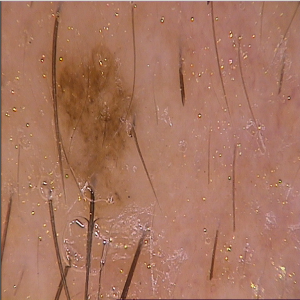

Index: 118 - Adjusted Image


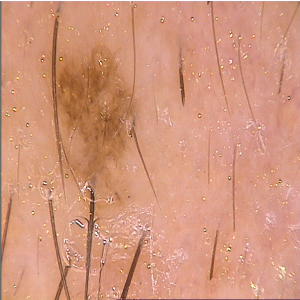

Index: 0 - Resized Image


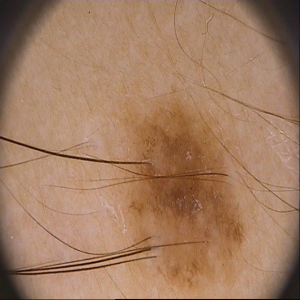

Index: 0 - Adjusted Image


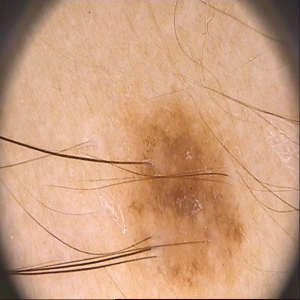

Index: 8 - Resized Image


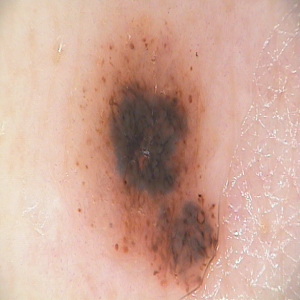

Index: 8 - Adjusted Image


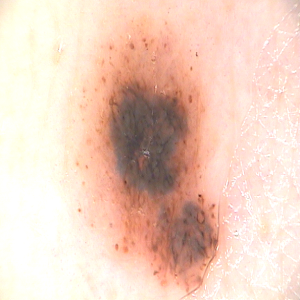

Index: 22 - Resized Image


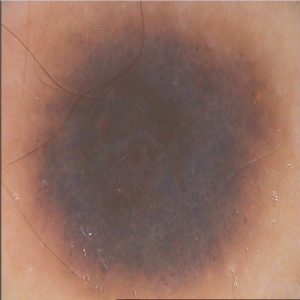

Index: 22 - Adjusted Image


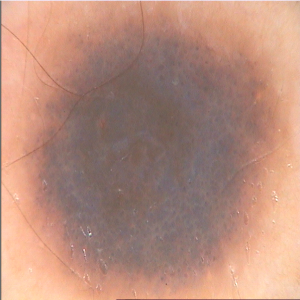

Index: 5 - Resized Image


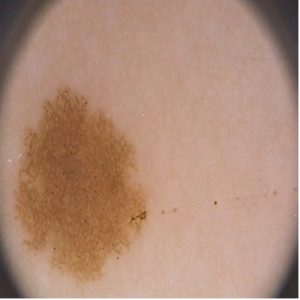

Index: 5 - Adjusted Image


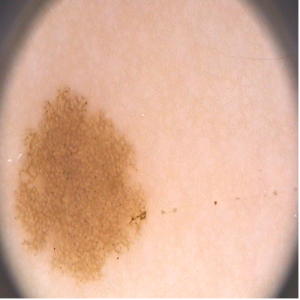

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Display selected images in smaller size
index = [118, 0, 8, 22, 5]

# Desired display size
display_width = 300
display_height = 300

for i in index:
    if i < len(adjusted_images):

        # Resize ONLY for display
        resized_disp = cv2.resize(
            resized_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        adjusted_disp = cv2.resize(
            adjusted_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        print(f"Index: {i} - Resized Image")
        cv2_imshow(resized_disp)

        print(f"Index: {i} - Adjusted Image")
        cv2_imshow(adjusted_disp)

    else:
        print(f"No adjusted image available at index {i}")


In [ ]:
    #NOISE REMOVING FILTERS

    # remove hair and noise

def remove_hairs_and_noise(adjusted_images):
    # Load the dermoscopic image
  image = adjusted_images

    # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to segment darker regions (hairs and noise)
  thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Perform morphological closing to fill small holes and gaps in the foreground
  kernel = np.ones((5, 5), np.uint8)
  closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Inpaint the detected regions to remove hairs and noise
  inpainted = cv2.inpaint(image, closing, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

  return inpainted


# List to store processed images
processed_images = []

# Process each dermoscopic image to remove hairs and noise
for image_path in tqdm(adjusted_images, desc='Processing images'):
  processed_image = remove_hairs_and_noise(image_path)
  processed_images.append(processed_image)

# Now you have all processed images stored in the 'processed_images' list
# You can use this list for further processing or analysis




Processing images: 100%|██████████| 200/200 [01:01<00:00,  3.23it/s]


In [ ]:
import pandas as pd

# Load the CSV file containing image paths and IDs
csv_file_path = "/content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv"
data = pd.read_csv(csv_file_path)

# Extract image IDs from the CSV file
image_ids = data["ID"]

# Convert image IDs to a list
image_ids_list = image_ids.tolist()

# Display the extracted image IDs
print("Image IDs:", image_ids_list)


Image IDs: ['IMD048', 'IMD040', 'IMD044', 'IMD047', 'IMD042', 'IMD050', 'IMD043', 'IMD041', 'IMD033', 'IMD039', 'IMD125', 'IMD078', 'IMD088', 'IMD090', 'IMD085', 'IMD064', 'IMD061', 'IMD063', 'IMD107', 'IMD134', 'IMD132', 'IMD135', 'IMD091', 'IMD092', 'IMD065', 'IMD057', 'IMD076', 'IMD075', 'IMD105', 'IMD080', 'IMD118', 'IMD108', 'IMD103', 'IMD058', 'IMD112', 'IMD101', 'IMD133', 'IMD120', 'IMD045', 'IMD049', 'IMD157', 'IMD142', 'IMD161', 'IMD150', 'IMD144', 'IMD139', 'IMD147', 'IMD154', 'IMD149', 'IMD138', 'IMD155', 'IMD162', 'IMD140', 'IMD156', 'IMD159', 'IMD152', 'IMD143', 'IMD146', 'IMD153', 'IMD137', 'IMD126', 'IMD243', 'IMD171', 'IMD170', 'IMD168', 'IMD254', 'IMD200', 'IMD219', 'IMD196', 'IMD177', 'IMD226', 'IMD211', 'IMD175', 'IMD173', 'IMD203', 'IMD182', 'IMD207', 'IMD210', 'IMD197', 'IMD199', 'IMD176', 'IMD204', 'IMD169', 'IMD206', 'IMD166', 'IMD198', 'IMD240', 'IMD242', 'IMD164', 'IMD160', 'IMD356', 'IMD349', 'IMD347', 'IMD369', 'IMD372', 'IMD339', 'IMD348', 'IMD370', 'IMD328'

In [ ]:
import os

# Create a directory to save the processed images
output_directory = "/content/drive/MyDrive/PH2Dataset/noisless_images"
os.makedirs(output_directory, exist_ok=True)

# Iterate through the processed images and save them with their IDs
for img_id, processed_image in zip(image_ids_list, processed_images):
    img_name = f"{img_id}.bmp"
    img_path = os.path.join(output_directory, img_name)
    cv2.imwrite(img_path, processed_image)


Index 0 - Adjusted Image


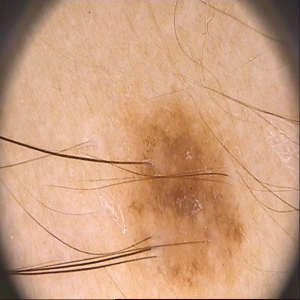

Index 0 - Processed Image


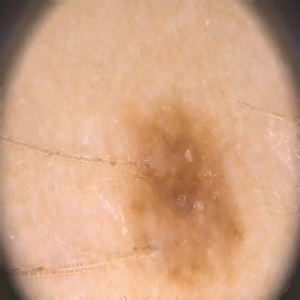

Index 1 - Adjusted Image


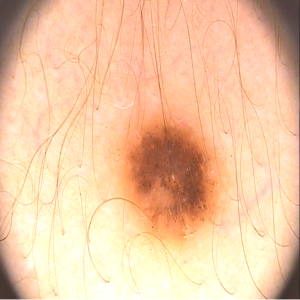

Index 1 - Processed Image


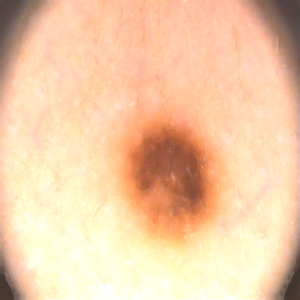

Index 2 - Adjusted Image


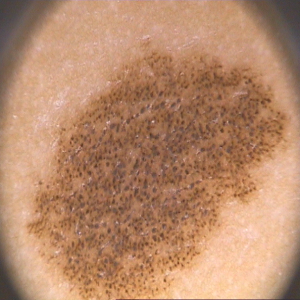

Index 2 - Processed Image


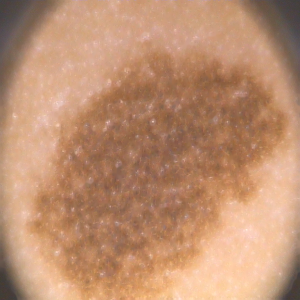

Index 3 - Adjusted Image


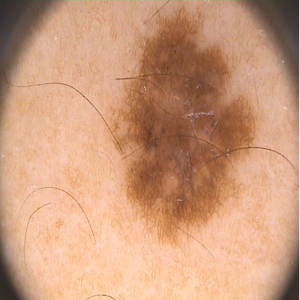

Index 3 - Processed Image


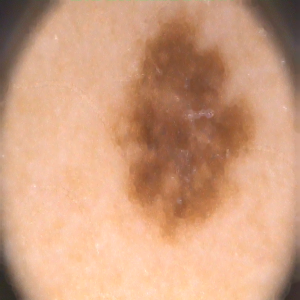

Index 4 - Adjusted Image


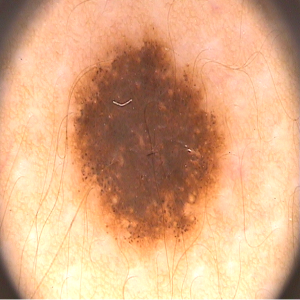

Index 4 - Processed Image


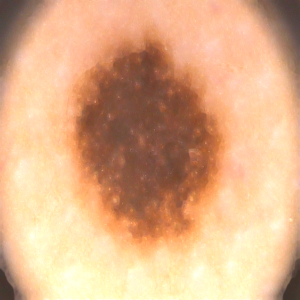

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Number of images to display
num_images = 5

# Display size (only for visualization)
display_width = 300
display_height = 300

for i in range(num_images):
    if i < len(adjusted_images) and i < len(processed_images):

        # Resize ONLY for display
        adjusted_disp = cv2.resize(
            adjusted_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        processed_disp = cv2.resize(
            processed_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        print(f"Index {i} - Adjusted Image")
        cv2_imshow(adjusted_disp)

        print(f"Index {i} - Processed Image")
        cv2_imshow(processed_disp)

    else:
        print(f"No image available at index {i}")


In [ ]:
import os
import csv
import cv2
processed_images=[]
# Function to read sequence from CSV file
def read_sequence_from_csv(csv_file):
    sequence = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            sequence.append(row[0] + '.bmp')  # Add the file extension
    return sequence

# Function to load images and store in a list
def load_images_from_folder(folder, sequence):
    images = []
    for filename in sequence:
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path):  # Check if the image file exists
            img = cv2.imread(img_path)
            images.append(img)
        else:
            print(f"Image not found: {img_path}")
    return images

# Folder containing images
folder_path = '/content/drive/MyDrive/PH2Dataset/noisless_images/'

# CSV file containing sequence of image filenames
csv_file_path = '/content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv'

# Read sequence from CSV file
sequence = read_sequence_from_csv(csv_file_path)

# Load images and store in a list
processed_images = load_images_from_folder(folder_path, sequence)

# Check the number of images loaded
print(f"Number of images loaded: {len(processed_images)}")


Image not found: /content/drive/MyDrive/PH2Dataset/noisless_images/ID.bmp
Number of images loaded: 200


In [ ]:
# Define the alpha (contrast) and beta (brightness) values
alpha = 1  # Contrast control (1.0-3.0)
beta = -20  # Brightness control (0-100)

# Create a list to store contrast-enhanced images
enhanced_images = []
# Apply contrast enhancement to each image in the list of processed images
for image in tqdm(processed_images, desc='Enhancing contrast'):
    # Apply contrast enhancement
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    # Append the enhanced image to the list
    enhanced_images.append(enhanced_image)

# Now you have all contrast-enhanced images stored in the 'enhanced_images' list
# You can use this list for further processing or analysis


Enhancing contrast: 100%|██████████| 200/200 [00:00<00:00, 281.86it/s]


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Number of images to display
num_images = 30

# Display size (only for visualization)
display_width = 300
display_height = 300

for i in range(num_images):
    if i < len(processed_images) and i < len(enhanced_images):

        # Resize ONLY for display
        processed_disp = cv2.resize(
            processed_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        enhanced_disp = cv2.resize(
            enhanced_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        print(f"Index {i} - Processed Image")
        cv2_imshow(processed_disp)

        print(f"Index {i} - Enhanced Image")
        cv2_imshow(enhanced_disp)

    else:
        print(f"No image available at index {i}")


Original Enhanced Image


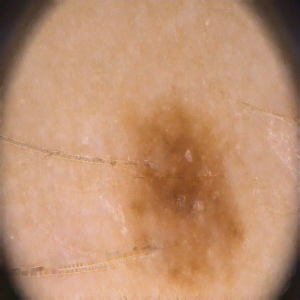

Color Normalized Image


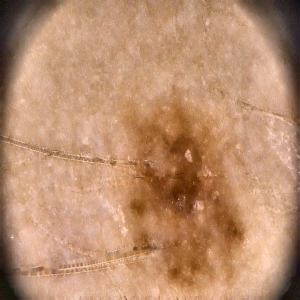

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def color_normalization(image):
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply CLAHE on L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_channel_equalized = clahe.apply(l_channel)

    # Merge channels back
    normalized_lab_image = cv2.merge((l_channel_equalized, a_channel, b_channel))

    # Convert back to BGR
    normalized_image = cv2.cvtColor(normalized_lab_image, cv2.COLOR_LAB2BGR)

    return normalized_image


# -----------------------------------
# Apply color normalization
# -----------------------------------
normalized_images = []

for image in enhanced_images:
    normalized_image = color_normalization(image)
    normalized_images.append(normalized_image)


# -----------------------------------
# Display original & normalized images (SMALL SIZE)
# -----------------------------------
display_width = 300
display_height = 300

if len(enhanced_images) > 0:

    # Resize ONLY for display
    original_disp = cv2.resize(
        enhanced_images[0],
        (display_width, display_height),
        interpolation=cv2.INTER_AREA
    )

    normalized_disp = cv2.resize(
        normalized_images[0],
        (display_width, display_height),
        interpolation=cv2.INTER_AREA
    )

    print("Original Enhanced Image")
    cv2_imshow(original_disp)

    print("Color Normalized Image")
    cv2_imshow(normalized_disp)

else:
    print("No images available to display")



In [ ]:
# Define the alpha (contrast) and beta (brightness) values
alpha = 1  # Contrast control (1.0-3.0)
beta = -20  # Brightness control (0-100)

# Create a list to store contrast-enhanced images
high_enhanced_images = []
# Apply contrast enhancement to each image in the list of processed images
for image in tqdm(normalized_images, desc='Enhancing contrast'):
    # Apply contrast enhancement
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    # Append the enhanced image to the list
    high_enhanced_images.append(enhanced_image)

# Now you have all contrast-enhanced images stored in the 'enhanced_images' list
# You can use this list for further processing or analysis


Enhancing contrast: 100%|██████████| 200/200 [00:00<00:00, 728.07it/s]


Index 112 - High Enhanced Image


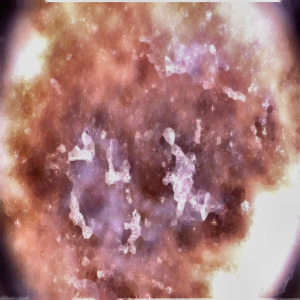

Index 112 - Normalized Image


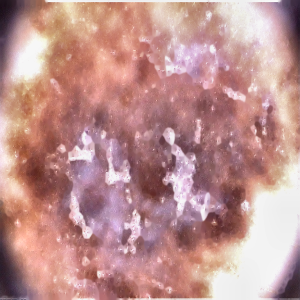

Index 131 - High Enhanced Image


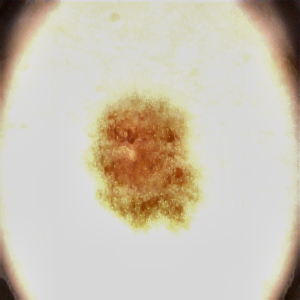

Index 131 - Normalized Image


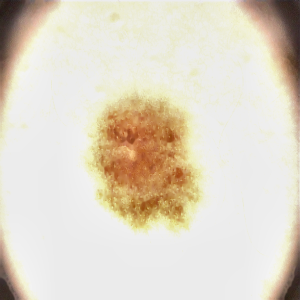

Index 133 - High Enhanced Image


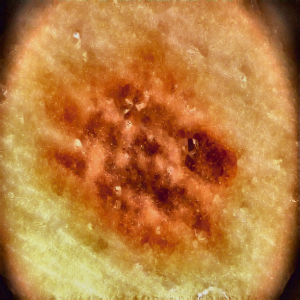

Index 133 - Normalized Image


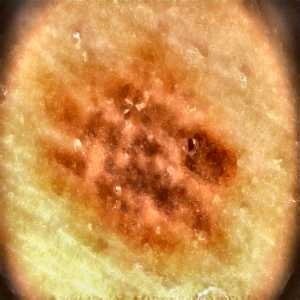

Index 141 - High Enhanced Image


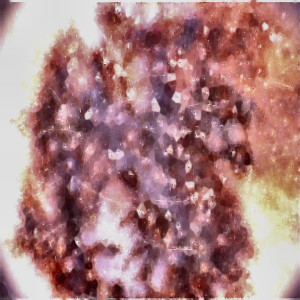

Index 141 - Normalized Image


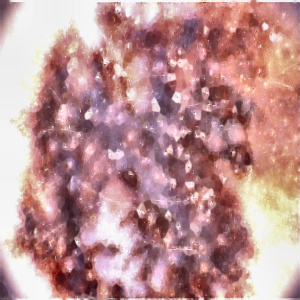

Index 160 - High Enhanced Image


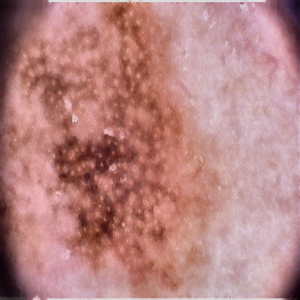

Index 160 - Normalized Image


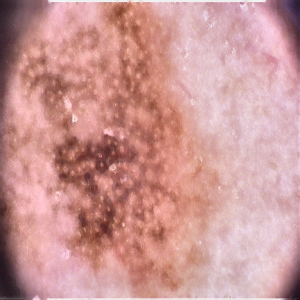

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Indices to display
m = [112, 131, 133, 141, 160]

# Display size (only for visualization)
display_width = 300
display_height = 300

for i in m:
    if i < len(high_enhanced_images) and i < len(normalized_images):

        # Resize ONLY for display
        high_enh_disp = cv2.resize(
            high_enhanced_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        norm_disp = cv2.resize(
            normalized_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        print(f"Index {i} - High Enhanced Image")
        cv2_imshow(high_enh_disp)

        print(f"Index {i} - Normalized Image")
        cv2_imshow(norm_disp)

    else:
        print(f"No image available at index {i}")


In [ ]:


def extract_lesion_mask(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to segment the lesion
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to enhance the mask
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=10)

    # Find contours in the mask
    contours, _ = cv2.findContours(sure_bg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask for the lesion
    lesion_mask = np.zeros_like(gray)

    # Draw contours on the lesion mask
    for contour in contours:
        cv2.drawContours(lesion_mask, [contour], -1, 255, -1)

    return lesion_mask

# Create a list to store lesion masks
lesion_masks_list = []

# Iterate through each image in the list of processed images
for image in high_enhanced_images:
    # Extract the lesion mask and append it to the list
    lesion_mask = extract_lesion_mask(image)
    lesion_masks_list.append(lesion_mask)



In [ ]:
import cv2
import numpy as np

# Function to apply mask to the original image
def apply_mask_to_image(image, mask):
    # Threshold the mask to obtain binary mask
    _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask of zeros with the same shape as the input image
    final_mask = np.zeros_like(image)

    if contours:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Draw the largest contour on the mask
        cv2.drawContours(final_mask, [largest_contour], 0, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, final_mask)

    return result

# List to store results
masked_images = []

# Apply the code to each lesion mask
for lesion_mask in lesion_masks_list:
    # Apply mask to the original image
    masked_image = apply_mask_to_image(lesion_mask, lesion_mask)

    # Append the masked image to the list
    masked_images.append(masked_image)


Index 112 - Normalized Image


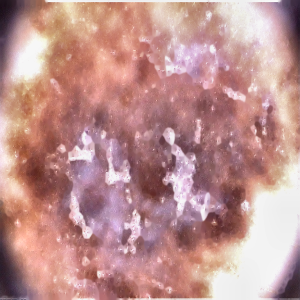

Index 112 - Masked Image


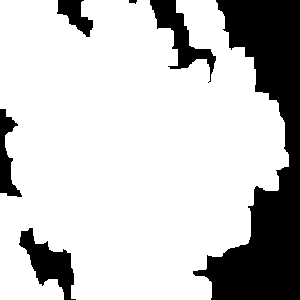

Index 131 - Normalized Image


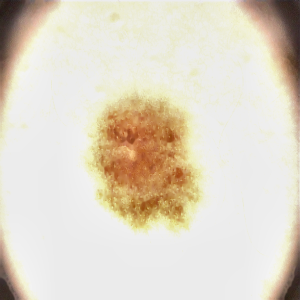

Index 131 - Masked Image


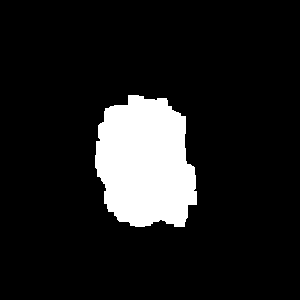

Index 133 - Normalized Image


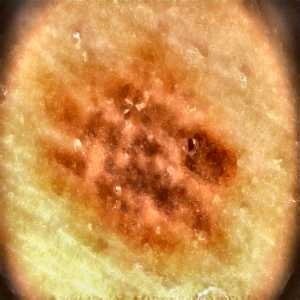

Index 133 - Masked Image


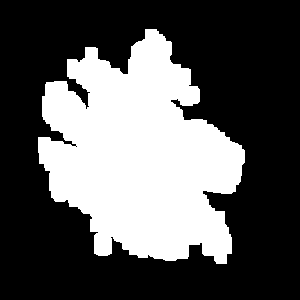

Index 141 - Normalized Image


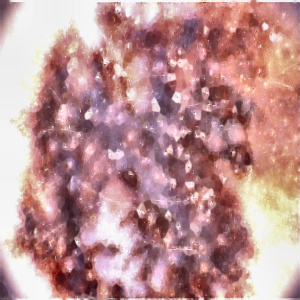

Index 141 - Masked Image


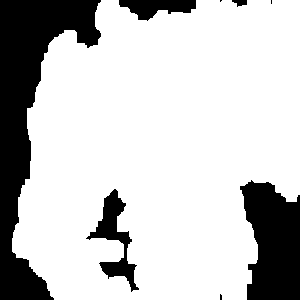

Index 160 - Normalized Image


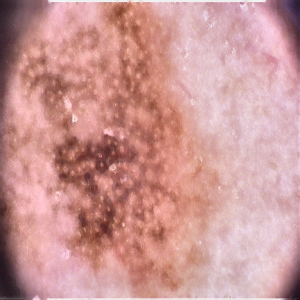

Index 160 - Masked Image


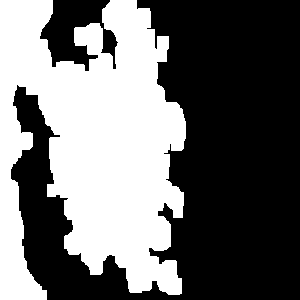

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Indices to display
jm = [112, 131, 133, 141, 160]

# Display size (only for visualization)
display_width = 300
display_height = 300

for i in jm:
    if i < len(normalized_images) and i < len(masked_images):

        # Resize ONLY for display
        norm_disp = cv2.resize(
            normalized_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        # Mask may be single-channel; convert to 3-channel for nicer display (optional)
        mask = masked_images[i]
        if len(mask.shape) == 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        mask_disp = cv2.resize(
            mask,
            (display_width, display_height),
            interpolation=cv2.INTER_NEAREST
        )

        print(f"Index {i} - Normalized Image")
        cv2_imshow(norm_disp)

        print(f"Index {i} - Masked Image")
        cv2_imshow(mask_disp)

    else:
        print(f"No image available at index {i}")


In [ ]:
# save paths of lesion masks in csv file

import os
import csv

# Define the path to the directory containing the dataset
dataset_dir = "/content/drive/MyDrive/PH2Dataset/PH2 Dataset images"

# Function to load lesion masks and save their paths to a CSV file
def load_lesion_mask(dataset_dir, csv_file):

    # Initialize a list to store the mask paths
    image_paths = []

    # Iterate over the image folders (IMDxxx)
    for image_folder in os.listdir(dataset_dir):

        # Full path to IMD folder
        full_image_folder = os.path.join(dataset_dir, image_folder)

        if os.path.isdir(full_image_folder):

            try:
                # Lesion mask folder
                lesion_mask_dir = os.path.join(
                    full_image_folder,
                    f"{image_folder}_lesion"
                )

                if not os.path.isdir(lesion_mask_dir):
                    raise FileNotFoundError(
                        f"Lesion mask folder not found for: {image_folder}"
                    )

                # ✅ CORRECT lesion mask filename
                lesion_mask_path = os.path.join(
                    lesion_mask_dir,
                    f"{image_folder}_lesion.bmp"
                )

                if not os.path.exists(lesion_mask_path):
                    raise FileNotFoundError(
                        f"Lesion mask file not found for: {image_folder}"
                    )

                # Append ID and correct mask path
                image_paths.append((image_folder, lesion_mask_path))

            except Exception as e:
                print(f"Error processing {image_folder}: {e}")

    # Write paths to CSV
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Image Path'])
        writer.writerows(image_paths)

    return image_paths


# CSV output path
csv_file_path = "/content/drive/MyDrive/PH2Dataset/lesion_masks_paths.csv"

# Generate CSV
image_paths = load_lesion_mask(dataset_dir, csv_file_path)

# Preview
print("Saved lesion mask paths to:", csv_file_path)
print("Sample paths:")

for img_id, path in image_paths[:5]:
    print(f"ID: {img_id}, Path: {path}")


Saved lesion mask paths to: /content/drive/MyDrive/PH2Dataset/lesion_masks_paths.csv
Sample paths:
ID: IMD048, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD048/IMD048_lesion/IMD048_lesion.bmp
ID: IMD040, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD040/IMD040_lesion/IMD040_lesion.bmp
ID: IMD044, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD044/IMD044_lesion/IMD044_lesion.bmp
ID: IMD047, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD047/IMD047_lesion/IMD047_lesion.bmp
ID: IMD042, Path: /content/drive/MyDrive/PH2Dataset/PH2 Dataset images/IMD042/IMD042_lesion/IMD042_lesion.bmp


Average Accuracy    : 0.9267978030385339
Average Sensitivity : 0.8606245569998395
Average Specificity : 0.9430440934930452


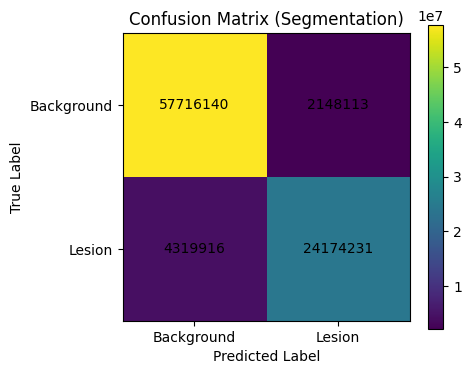

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

csv_path = "/content/drive/MyDrive/PH2Dataset/lesion_masks_paths.csv"
df = pd.read_csv(csv_path)

# To accumulate all pixels across all images
all_gt_pixels = []
all_pred_pixels = []

acc_list, sens_list, spec_list = [], [], []

for i, row in df.iterrows():

    # -------------------------------
    # Generated mask
    # -------------------------------
    pred_mask = (masked_images[i] > 0).astype(np.uint8)

    # -------------------------------
    # Ground truth mask path
    # -------------------------------
    image_id = row["ID"]
    gt_mask_path = (
        f"/content/drive/MyDrive/PH2Dataset/PH2 Dataset images/"
        f"{image_id}/{image_id}_lesion/{image_id}_lesion.bmp"
    )

    if not os.path.exists(gt_mask_path):
        continue

    gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask = (gt_mask > 0).astype(np.uint8)

    # Resize if needed
    if pred_mask.shape != gt_mask.shape:
        gt_mask = cv2.resize(
            gt_mask,
            (pred_mask.shape[1], pred_mask.shape[0]),
            interpolation=cv2.INTER_NEAREST
        )

    # Flatten
    gt_flat = gt_mask.flatten()
    pred_flat = pred_mask.flatten()

    # Store for overall confusion matrix
    all_gt_pixels.extend(gt_flat)
    all_pred_pixels.extend(pred_flat)

    # Per-image metrics
    acc_list.append(accuracy_score(gt_flat, pred_flat))
    sens_list.append(recall_score(gt_flat, pred_flat, pos_label=1))
    spec_list.append(recall_score(gt_flat, pred_flat, pos_label=0))

# -------------------------------
# Final metrics
# -------------------------------
print("Average Accuracy    :", np.mean(acc_list))
print("Average Sensitivity :", np.mean(sens_list))
print("Average Specificity :", np.mean(spec_list))

# -------------------------------
# Confusion Matrix (overall)
# -------------------------------
cm = confusion_matrix(all_gt_pixels, all_pred_pixels)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Segmentation)")
plt.colorbar()

plt.xticks([0, 1], ["Background", "Lesion"])
plt.yticks([0, 1], ["Background", "Lesion"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Index 0 - High Enhanced Image


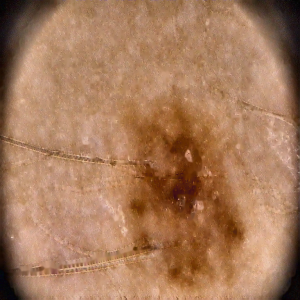

Index 0 - Masked Image


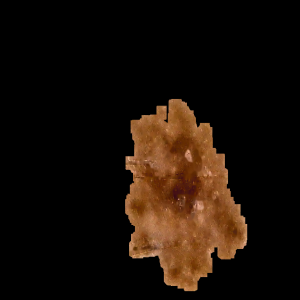

Index 1 - High Enhanced Image


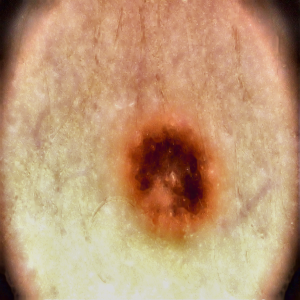

Index 1 - Masked Image


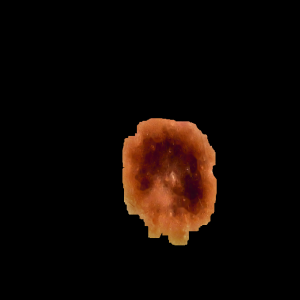

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def apply_mask_to_image(original_image, mask):
    # Ensure mask is single channel and uint8
    if len(mask.shape) == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.astype('uint8')

    # Apply the mask
    result = cv2.bitwise_and(original_image, original_image, mask=mask)
    return result


# -----------------------------------
# Apply masks to images
# -----------------------------------
masked_imagess = []

for original_image, lesion_mask in zip(high_enhanced_images, masked_images):
    masked_image = apply_mask_to_image(original_image, lesion_mask)
    masked_imagess.append(masked_image)


# -----------------------------------
# Display masked images (SMALL SIZE)
# -----------------------------------
display_width = 300
display_height = 300

for i in range(2):
    if i < len(high_enhanced_images) and i < len(masked_imagess):

        original_disp = cv2.resize(
            high_enhanced_images[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        masked_disp = cv2.resize(
            masked_imagess[i],
            (display_width, display_height),
            interpolation=cv2.INTER_AREA
        )

        print(f"Index {i} - High Enhanced Image")
        cv2_imshow(original_disp)

        print(f"Index {i} - Masked Image")
        cv2_imshow(masked_disp)

    else:
        print(f"No image available at index {i}")


In [ ]:
import os

# Create a directory to save the processed images
output_directory = "/content/drive/MyDrive/PH2Dataset/masked_images"
os.makedirs(output_directory, exist_ok=True)

# Iterate through the processed images and save them with their IDs
for img_id, masked_imagess in zip(image_ids_list, masked_imagess):
    img_name = f"{img_id}.bmp"
    img_path = os.path.join(output_directory, img_name)
    cv2.imwrite(img_path, masked_imagess)

In [ ]:
import cv2
import numpy as np
import pandas as pd
import skimage.feature
from skimage.color import rgb2lab
from skimage.measure import shannon_entropy

def extract_texture_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Convert to unsigned integer type
    gray_image_uint = (gray_image * 255).astype(np.uint8)

    # Compute GLCM
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = skimage.feature.graycomatrix(gray_image_uint, distances, angles, symmetric=True, normed=True)

    # Compute GLCM properties
    contrast = skimage.feature.graycoprops(glcm, 'contrast').ravel()
    dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity').ravel()
    homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity').ravel()
    energy = skimage.feature.graycoprops(glcm, 'energy').ravel()
    correlation = skimage.feature.graycoprops(glcm, 'correlation').ravel()

    return np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation])

def extract_color_features(image):
    # Convert image to Lab color space
    lab_image = rgb2lab(image)

    # Compute mean and standard deviation for each channel
    mean_lab = np.mean(lab_image, axis=(0, 1))
    std_lab = np.std(lab_image, axis=(0, 1))

    return np.concatenate([mean_lab, std_lab])

def extract_shape_features(image):
    # Compute Shannon entropy as a shape feature
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    entropy = shannon_entropy(gray_image)

    # Compute area and perimeter as additional shape features
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(contours[0])
    perimeter = cv2.arcLength(contours[0], closed=True)

    return np.array([entropy, area, perimeter])

def extract_features_from_images(images, image_ids):
    all_features = []

    for image, image_id in zip(images, image_ids):
        texture_feats = extract_texture_features(image)
        color_feats = extract_color_features(image)
        shape_feats = extract_shape_features(image)

        features = np.concatenate([texture_feats, color_feats, shape_feats])
        all_features.append(features)

    return np.array(all_features)

import pandas as pd

# Load image paths and IDs from the CSV file
image_data = pd.read_csv('/content/drive/MyDrive/PH2Dataset/dermoscopic_image_paths.csv')

# Extract only the IDs
image_ids = image_data['ID'].tolist()
images=masked_imagess
# Assuming you already have the images stored in a list called 'images'

# Now you can proceed to extract features from the images using the 'images' list and 'image_ids'
# Replace the placeholder 'images' with your actual list of images in the following code snippet

# Extract features from images
all_features = extract_features_from_images(images, image_ids)

# Create a DataFrame to store features along with image IDs
texture_feature_names = [f'texture_feature_{i}' for i in range(60)]
color_feature_names = [f'color_feature_{i}' for i in range(6)]
shape_feature_names = ['shape_entropy', 'shape_area', 'shape_perimeter']
feature_names = texture_feature_names + color_feature_names + shape_feature_names
df = pd.DataFrame(all_features, columns=feature_names)
df['Image_ID'] = image_ids

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/PH2Dataset/image_featuresss.csv', index=False)


In [ ]:
import pandas as pd

# Load image features from existing CSV file
image_features_df = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_featuresss.csv')

# Load labels (levels) from Excel file
labels_df = pd.read_excel('/content/drive/MyDrive/Label.xlsx')

# Rename the column in labels_df to match the column name in image_features_df
labels_df.rename(columns={'Image': 'Image_ID'}, inplace=True)

# Ensure that the column names are the same
if 'Image_ID' not in image_features_df.columns or 'Image_ID' not in labels_df.columns:
    raise KeyError("Column 'Image_ID' not found in both DataFrames.")

# Merge datasets based on image IDs
merged_df = pd.merge(image_features_df, labels_df, on='Image_ID', how='left')

# Save the updated dataset to a new CSV file
merged_df.to_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Separate features and labels
X = dataset.drop(['Image_ID', 'Label'], axis=1)
y = dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity, specificity, precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate AUC
y_scores = svm_clf.decision_function(X_test)
auc = roc_auc_score(y_test, y_scores)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)



Accuracy: 0.85
Sensitivity: 0.6666666666666666
Specificity: 0.9032258064516129
Precision: 0.6666666666666666
Recall: 0.6666666666666666
AUC: 0.8422939068100358


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Separate features and labels
X = dataset.drop(['Image_ID', 'Label'], axis=1)
y = dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a k-Nearest Neighbors (KNN) classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity, specificity, precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.8
Sensitivity: 0.5555555555555556
Specificity: 0.8709677419354839
Precision: 0.5555555555555556
Recall: 0.5555555555555556


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Separate features and labels
X = dataset.drop(['Image_ID', 'Label'], axis=1)
y = dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity, specificity, precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)

# Calculate ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc)



Accuracy: 0.9
Sensitivity: 0.6666666666666666
Specificity: 0.967741935483871
Precision: 0.8571428571428571
Recall: 0.6666666666666666
ROC AUC Score: 0.9211469534050178


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Separate features and labels
X = dataset.drop(['Image_ID', 'Label'], axis=1)
y = dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity, specificity, precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.825
Sensitivity: 0.6666666666666666
Specificity: 0.8709677419354839
Precision: 0.6
Recall: 0.6666666666666666


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Separate features and labels
X = dataset.drop(['Image_ID', 'Label'], axis=1)
y = dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity, specificity, precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate AUC
y_scores = svm_clf.decision_function(X_test)
auc = roc_auc_score(y_test, y_scores)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)



Accuracy: 0.85
Sensitivity: 0.6666666666666666
Specificity: 0.9032258064516129
Precision: 0.6666666666666666
Recall: 0.6666666666666666
AUC: 0.8422939068100358


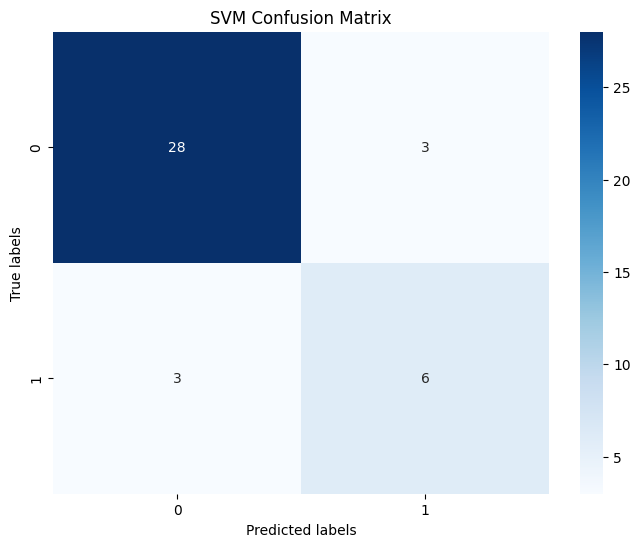

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')
plt.show()

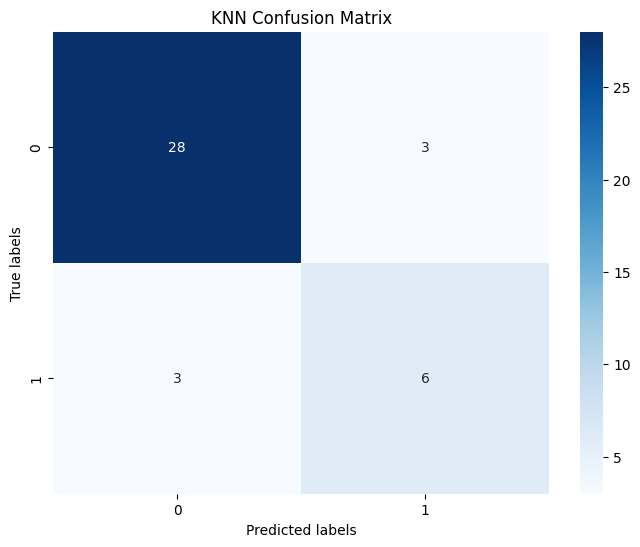

In [ ]:
plt.figure(figsize=(8, 6))
knn_ = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


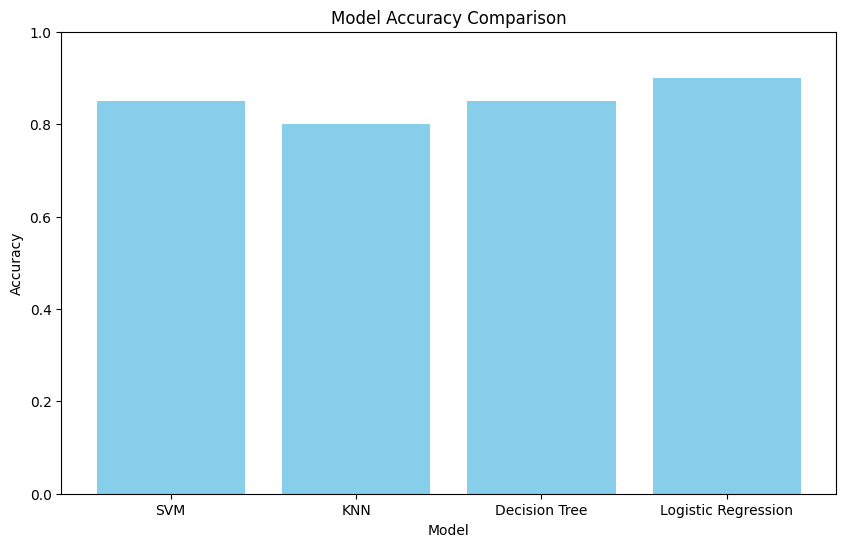

In [ ]:


# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/PH2Dataset/image_features_with_levelss.csv')

# Assuming 'features' contains the features and 'labels' contains the target labels
X = df.drop(columns=['Label','Image_ID'])  # Features
y = df['Label']  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each classifier
accuracies = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[clf_name] = accuracy_score(y_test, y_pred)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
